# Analysis of prospective New Office locations in the city of Vancouver, Canada.

### One of the key challenges faced by a business is to identify prospective locations to set up its office. Various factors come into play in taking this decision. The issue is especially demanding for the MNCs that frequently need to set up offices at new locations across the globe. Although the decision making process is highly subjective, the process largely includes a common format - 

### “Businesses need the data regarding the amenities at different areas in a target city !!”

### Getting such data is of use particularly for international businesses that have never been players in that city/area. Getting this data will help in having an idea about the different factors that affect business. For an example, a Travel / Tourism startup might prefer a location that is close to a major bus terminus, railway station, airport or a place where often tourism fairs are organised. A restaurant chain might look to expand its business in another part of the city where other providers are available and the footfall is high !! They might try to lure in customers of a competitive business by opening a branch nearby. But for all these to happen, they need authentic up-to-date information on the particulars of an area.

### In this document, we will discuss one such case study where we develop a model to offer strategic business locations for businesses - both new and existing to choose a particular area (Postal Code) in the city of Vancouver, Canada, as a prospective site for them to open office and expand their business.


# The data used -

### As discussed in the last paragraph, we concluded that we will develop a model that is able to showcase the characteristics of a particular area in the city of Vancouver. For that to happen, we need a list of all the areas in that city. In our case, our first aim is to obtain the postal code addresses of the city of Vancouver from “www.zip-codes.com”. We then convert the relevant data into a dataframe using pandas. Now, we need to obtain the latitude and longitude values of these postal areas. For that we use Google’s Geocoding API. We add the newly fetched latitude and longitude values into the Data Frame against relevant Postal Codes and pass each such row to the Foursquare API to obtain the Venues around those locations. In such a way we are able to gain insight about the venues in the postal area.

### We can then cluster the Data Frame into groups based on the data pertaining to the venues and when the user inserts his priority (such as location near banks, rental spaces, event spaces, or restros), the best locations against the respective clusters are displayed, thus helping him decide the venue for his business.  


## Let's start by importing the Libraries

In [1]:
import numpy as np

import pandas as pd 
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import requests

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

## Reading the Vancouver Postal Code data from zip-codes.com and creating a List of Zip Codes

In [2]:
from bs4 import BeautifulSoup
#Reading HTMl page
url='https://www.zip-codes.com/canadian/city.asp?city=vancouver&province=bc'
response=requests.get(url)
html = response.text
page = BeautifulSoup(html,'lxml')

In [3]:
contents=page.find_all('a')

In [4]:
l = []
for link in page.findAll('a'):
    l.append(link.string)

In [5]:
list_of_VC = []
for i in range(27,427):
    list_of_VC.append(l[i])
print(list_of_VC)

['V5K 0A1', 'V5K 0A2', 'V5K 0A3', 'V5K 0A4', 'V5K 0A5', 'V5K 0A6', 'V5K 0A7', 'V5K 0A8', 'V5K 0A9', 'V5K 0B1', 'V5K 0B2', 'V5K 0B3', 'V5K 0B4', 'V5K 0B5', 'V5K 0B6', 'V5K 0B7', 'V5K 0B8', 'V5K 0B9', 'V5K 0C1', 'V5K 0C2', 'V5K 0C3', 'V5K 0C4', 'V5K 0C5', 'V5K 0C6', 'V5K 0C7', 'V5K 0C9', 'V5K 0E1', 'V5K 0E2', 'V5K 0E3', 'V5K 0E4', 'V5K 0E5', 'V5K 0E6', 'V5K 0E7', 'V5K 1A1', 'V5K 1A4', 'V5K 1A5', 'V5K 1A6', 'V5K 1A7', 'V5K 1A8', 'V5K 1A9', 'V5K 1B1', 'V5K 1B2', 'V5K 1B3', 'V5K 1B4', 'V5K 1B5', 'V5K 1B6', 'V5K 1B7', 'V5K 1B8', 'V5K 1B9', 'V5K 1C1', 'V5K 1C3', 'V5K 1C4', 'V5K 1C5', 'V5K 1C6', 'V5K 1C7', 'V5K 1C8', 'V5K 1C9', 'V5K 1E1', 'V5K 1E2', 'V5K 1E3', 'V5K 1E4', 'V5K 1E5', 'V5K 1E6', 'V5K 1E7', 'V5K 1E8', 'V5K 1E9', 'V5K 1G1', 'V5K 1G2', 'V5K 1G3', 'V5K 1G4', 'V5K 1G5', 'V5K 1G6', 'V5K 1G7', 'V5K 1G8', 'V5K 1G9', 'V5K 1H1', 'V5K 1H2', 'V5K 1H3', 'V5K 1H4', 'V5K 1H5', 'V5K 1H6', 'V5K 1H7', 'V5K 1H8', 'V5K 1H9', 'V5K 1J1', 'V5K 1J2', 'V5K 1J3', 'V5K 1J4', 'V5K 1J5', 'V5K 1J6', 'V5K 1J7'

## Getting co-ordinates against these Postal Codes using Google's Geocoding API and creating the Data Frame

In [6]:
# The code was removed by Watson Studio for sharing.

In [7]:
# The code was removed by Watson Studio for sharing.

In [8]:
columns=['postalcode','neighborhood','latitude','longitude']

In [9]:
df = pd.DataFrame(columns=columns)

In [10]:
df

,postalcode,neighborhood,latitude,longitude


In [11]:
for i in list_of_VC:
    #print("-----"+i+"-----")
    url=base_url + i + '&key=' + my_key
    #print(url)
    result= requests.get(url)
    s=result.json()
    neigh=s['results'][0]['address_components'][1]['long_name']
    lat  =s['results'][0]['geometry']['location']['lat']
    lng  =s['results'][0]['geometry']['location']['lng']
    df = df.append({'postalcode': i, 'neighborhood': neigh, 'latitude': lat, 'longitude': lng}, ignore_index=True)

In [12]:
df.shape

(400, 4)

## Thus we see that in the Vancouver Data, we have predominantly two neighbourhoods !!

In [13]:
df.groupby('neighborhood').count()

,postalcode,latitude,longitude
neighborhood,,,
East Vancouver,375,375,375
Vancouver,25,25,25


## Now that our Data Frame is ready let's explore the various Postal Code Areas in Vancouver using Foursquare API !!

In [14]:
# The code was removed by Watson Studio for sharing.

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        #print(url)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
LIMIT=30
Vancouver_Venues_List = getNearbyVenues(names=df['postalcode'],
                                  latitudes=df['latitude'],
                                  longitudes=df['longitude']
                                  )

In [17]:
Vancouver_Venues_List.shape

(5445, 7)

In [18]:
Vancouver_Venues_List.rename(columns={"Neighborhood": "Postal Areas"},inplace=True)

## Let's count the neighbourhoods discovered by Foursquare API against the Postal Area Codes

In [19]:
Vancouver_Venues_List.groupby('Postal Areas').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postal Areas,,,,,,
V5K 0A1,4,4,4,4,4,4
V5K 0A2,11,11,11,11,11,11
V5K 0A3,15,15,15,15,15,15
V5K 0A4,30,30,30,30,30,30
V5K 0A5,8,8,8,8,8,8
V5K 0A6,4,4,4,4,4,4
V5K 0A7,2,2,2,2,2,2
V5K 0A8,23,23,23,23,23,23
V5K 0A9,27,27,27,27,27,27


In [20]:
# let's check the number of unique categories !!
print('There are {} uniques categories.'.format(len(Vancouver_Venues_List['Venue Category'].unique())))

There are 98 uniques categories.


## Let's split the Venue Categories now.

In [21]:
# one hot encoding
Vancouver_onehot = pd.get_dummies(Vancouver_Venues_List[['Venue Category']], prefix="", prefix_sep="")

#add postal area, latitude and longitude columns back to dataframe
Vancouver_onehot['Postal Areas'] = Vancouver_Venues_List['Postal Areas'] 

# move Postal Areas column to the first column
fixed_columns = [Vancouver_onehot.columns[-1]] + list(Vancouver_onehot.columns[:-1])

Vancouver_onehot = Vancouver_onehot[fixed_columns]

Vancouver_onehot

,Postal Areas,American Restaurant,Amphitheater,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Beach,...,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Trail,Tunnel,Vietnamese Restaurant
0,V5K 0A1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,V5K 0A1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,V5K 0A1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,V5K 0A1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,V5K 0A2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,V5K 0A2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,V5K 0A2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,V5K 0A2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,V5K 0A2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,V5K 0A2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
Vancouver_grouped = Vancouver_onehot.groupby('Postal Areas').mean().reset_index()
Vancouver_grouped

,Postal Areas,American Restaurant,Amphitheater,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Beach,...,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Trail,Tunnel,Vietnamese Restaurant
0,V5K 0A1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.25,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,V5K 0A2,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.0,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.090909,0.000000
2,V5K 0A3,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.0,0.00,...,0.066667,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.0,0.000000,0.000000
3,V5K 0A4,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.0,0.00,...,0.066667,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.133333
4,V5K 0A5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.125000
5,V5K 0A6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.25,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
6,V5K 0A7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
7,V5K 0A8,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.0,0.00,...,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
8,V5K 0A9,0.037037,0.037037,0.000000,0.000000,0.000000,0.037037,0.000000,0.0,0.00,...,0.037037,0.000000,0.000000,0.037037,0.074074,0.074074,0.000000,0.0,0.000000,0.037037
9,V5K 0B1,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.0,0.00,...,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.142857


In [23]:
Vancouver_grouped.shape

(400, 99)

## Let's find out what normally are the top venues in the area. Considering our parameters ..

In [24]:
num_top_venues = 5

for hood in Vancouver_grouped['Postal Areas']:
    print("----"+hood+"----")
    temp = Vancouver_grouped[Vancouver_grouped['Postal Areas'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----V5K 0A1----
                  venue  freq
0                  Pool  0.25
1                  Pier  0.25
2                  Park  0.25
3                 Beach  0.25
4  Marijuana Dispensary  0.00


----V5K 0A2----
                  venue  freq
0     Convenience Store  0.09
1           Bridal Shop  0.09
2    Italian Restaurant  0.09
3  Fast Food Restaurant  0.09
4                  Park  0.09


----V5K 0A3----
              venue  freq
0      Soccer Field  0.13
1  Sushi Restaurant  0.07
2               Pub  0.07
3        Restaurant  0.07
4       College Gym  0.07


----V5K 0A4----
                   venue  freq
0  Vietnamese Restaurant  0.13
1            Coffee Shop  0.13
2                   Café  0.07
3               Pharmacy  0.07
4       Sushi Restaurant  0.07


----V5K 0A5----
                   venue  freq
0  Vietnamese Restaurant  0.12
1            Gas Station  0.12
2            Pizza Place  0.12
3                   Park  0.12
4         Massage Studio  0.12


----V5K 0A6----
      

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postal Areas']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Postal Areas'] = Vancouver_grouped['Postal Areas']

for ind in np.arange(Vancouver_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Vancouver_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Postal Areas,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,V5K 0A1,Pool,Park,Beach,Pier,Vietnamese Restaurant,Donut Shop,College Gym,Convenience Store,Deli / Bodega,Dessert Shop
1,V5K 0A2,Coffee Shop,Italian Restaurant,Bus Stop,Bus Station,Bridal Shop,Park,Fast Food Restaurant,Convenience Store,Hotel,Athletics & Sports
2,V5K 0A3,Soccer Field,Café,Fast Food Restaurant,Chinese Restaurant,Bus Stop,Bus Station,Pub,Restaurant,College Gym,Coffee Shop
3,V5K 0A4,Vietnamese Restaurant,Coffee Shop,Sushi Restaurant,Café,Pharmacy,Grocery Store,Hot Dog Joint,Middle Eastern Restaurant,Bakery,Malay Restaurant
4,V5K 0A5,Vietnamese Restaurant,Sporting Goods Shop,Gas Station,Massage Studio,Deli / Bodega,Convenience Store,Park,Pizza Place,Bar,Fair


In [27]:
# set number of clusters
kclusters = 5

Vancouver_grouped_clustering = Vancouver_grouped.drop('Postal Areas', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Vancouver_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 3, 2, 2, 1, 1, 1], dtype=int32)

In [28]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Vancouver_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Vancouver_merged = df.join(neighborhoods_venues_sorted.set_index('Postal Areas'), on='postalcode')

Vancouver_merged.head() # check the last columns!

,postalcode,neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,V5K 0A1,Vancouver,49.291018,-123.040352,1,Pool,Park,Beach,Pier,Vietnamese Restaurant,Donut Shop,College Gym,Convenience Store,Deli / Bodega,Dessert Shop
1,V5K 0A2,East Vancouver,49.285023,-123.028471,1,Coffee Shop,Italian Restaurant,Bus Stop,Bus Station,Bridal Shop,Park,Fast Food Restaurant,Convenience Store,Hotel,Athletics & Sports
2,V5K 0A3,East Vancouver,49.280953,-123.028838,1,Soccer Field,Café,Fast Food Restaurant,Chinese Restaurant,Bus Stop,Bus Station,Pub,Restaurant,College Gym,Coffee Shop
3,V5K 0A4,East Vancouver,49.280918,-123.051041,1,Vietnamese Restaurant,Coffee Shop,Sushi Restaurant,Café,Pharmacy,Grocery Store,Hot Dog Joint,Middle Eastern Restaurant,Bakery,Malay Restaurant
4,V5K 0A5,East Vancouver,49.272429,-123.052170,3,Vietnamese Restaurant,Sporting Goods Shop,Gas Station,Massage Studio,Deli / Bodega,Convenience Store,Park,Pizza Place,Bar,Fair


In [29]:
Vancouver_merged.dropna(subset=['Cluster Labels'],inplace=True)

In [30]:
Vancouver_merged['Cluster Labels'].unique()

array([1, 3, 2, 0, 4])

In [31]:
Vancouver_merged['Cluster Labels'] = Vancouver_merged['Cluster Labels'].astype('int32')

## Now let's create the map and see how our Postal Area Clusters look !!

In [32]:
# create map

address = 'Vancouver, British Columbia, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vancouver are {}, {}.'.format(latitude, longitude))

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Vancouver_merged['latitude'], Vancouver_merged['longitude'], Vancouver_merged['postalcode'], Vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The geograpical coordinate of Vancouver are 49.2608724, -123.1139529.


In [34]:
# The code was removed by Watson Studio for sharing.

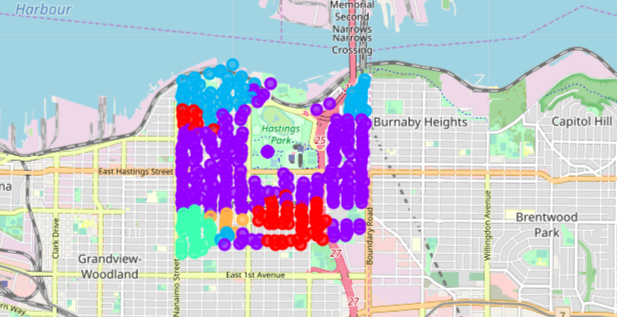

In [35]:
from IPython.display import Image
Image(filename='img.png')

## Let's examine the clusters now.

## Note that For our purpose, we need to prioritise certain venues.

### In order for us to select the particular neighbourhood suitable for the business, it is imperative to filter the categories pertaining to our problem. Hence, we will stress on the categories such as Bank, Bus Stop, Event Space, Office, Paper/Office, Supplies Store, etc. over restaurants and amusement parks.

## Let's list the venue category names once again

In [52]:
for i in Vancouver_grouped.columns[1:]:
    print(i)

American Restaurant
Amphitheater
Asian Restaurant
Athletics & Sports
BBQ Joint
Bakery
Bank
Bar
Beach
Beer Garden
Beer Store
Belgian Restaurant
Breakfast Spot
Brewery
Bridal Shop
Bubble Tea Shop
Burger Joint
Bus Line
Bus Station
Bus Stop
Café
Casino
Chinese Restaurant
Clothing Store
Coffee Shop
College Gym
Convenience Store
Deli / Bodega
Dessert Shop
Dim Sum Restaurant
Diner
Discount Store
Dog Run
Donut Shop
Event Space
Fair
Farm
Farmers Market
Fast Food Restaurant
Fried Chicken Joint
Fruit & Vegetable Store
Gas Station
Golf Course
Greek Restaurant
Grocery Store
Gun Shop
Gym / Fitness Center
Gym Pool
Historic Site
Hobby Shop
Hockey Arena
Hot Dog Joint
Hotel
Ice Cream Shop
Indian Restaurant
Inn
Italian Restaurant
Japanese Restaurant
Korean Restaurant
Latin American Restaurant
Liquor Store
Malay Restaurant
Marijuana Dispensary
Market
Massage Studio
Mexican Restaurant
Middle Eastern Restaurant
Office
Paper / Office Supplies Store
Park
Pharmacy
Pier
Pizza Place
Pool
Portuguese Restaurant
Pu

## Let's ask the user for his/her priority venues based on which we will filter the clusters

In [94]:
pr1=input("What is your first priority ? NOTE: Enter the words as in the list - data is case sensitive !!")
display(pr1)



# create map

address = 'Vancouver, British Columbia, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude + 0.05
longitude = location.longitude + 0.1
print('The geograpical coordinate of Vancouver are {}, {}.'.format(latitude, longitude))

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


clus=Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 0, :]
clusa=clus[clus['1st Most Common Venue']==pr1]
clusb=clus[clus['2nd Most Common Venue']==pr1]
clusc=clus[clus['3rd Most Common Venue']==pr1]

a=clusa.append(clusb.append(clusc))
print("The Cluster 0 Data based on User's Priority -")
print(a[a.columns[[0]+[5]+[6]+[7]]])
print("\n")


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(a['latitude'], a['longitude'], a['postalcode'], a['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)





clus=Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 1, :]
clusa=clus[clus['1st Most Common Venue']==pr1]
clusb=clus[clus['2nd Most Common Venue']==pr1]
clusc=clus[clus['3rd Most Common Venue']==pr1]

b=clusa.append(clusb.append(clusc))
print("The Cluster 1 Data based on User's Priority -")
print(b[b.columns[[0]+[5]+[6]+[7]]])
print("\n")


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(b['latitude'], b['longitude'], b['postalcode'], b['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)



clus=Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 2, :]
clusa=clus[clus['1st Most Common Venue']==pr1]
clusb=clus[clus['2nd Most Common Venue']==pr1]
clusc=clus[clus['3rd Most Common Venue']==pr1]

c=clusa.append(clusb.append(clusc))
print("The Cluster 2 Data based on User's Priority -")
print(c[c.columns[[0]+[5]+[6]+[7]]])
print("\n")


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(c['latitude'], c['longitude'], c['postalcode'], c['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)



clus=Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 3, :]
clusa=clus[clus['1st Most Common Venue']==pr1]
clusb=clus[clus['2nd Most Common Venue']==pr1]
clusc=clus[clus['3rd Most Common Venue']==pr1]

d=clusa.append(clusb.append(clusc))
print("The Cluster 3 Data based on User's Priority -")
print(d[d.columns[[0]+[5]+[6]+[7]]])
print("\n")


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(d['latitude'], d['longitude'], d['postalcode'], d['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)



clus=Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 4, :]
clusa=clus[clus['1st Most Common Venue']==pr1]
clusb=clus[clus['2nd Most Common Venue']==pr1]
clusc=clus[clus['3rd Most Common Venue']==pr1]

e=clusa.append(clusb.append(clusc))
print("The Cluster 4 Data based on User's Priority -")
print(e[e.columns[[0]+[5]+[6]+[7]]])
print("\n")


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(e['latitude'], e['longitude'], e['postalcode'], e['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)


       
map_clusters

What is your first priority ? NOTE: Enter the words as in the list - data is case sensitive !!Office


'Office'

The geograpical coordinate of Vancouver are 49.310872399999994, -123.0139529.
The Cluster 0 Data based on User's Priority -
    postalcode 1st Most Common Venue 2nd Most Common Venue  \
316    V5K 2S4           Pizza Place                Office   
265    V5K 2K7           Pizza Place           Event Space   
291    V5K 2N6           Pizza Place           Event Space   
312    V5K 2R9           Pizza Place           Bridal Shop   
313    V5K 2S1           Pizza Place           Bridal Shop   
330    V5K 2T9           Pizza Place           Bridal Shop   
331    V5K 2V1           Pizza Place           Bridal Shop   
332    V5K 2V2           Pizza Place           Bridal Shop   
333    V5K 2V3           Pizza Place           Bridal Shop   
334    V5K 2V4           Pizza Place           Bridal Shop   
335    V5K 2V5           Pizza Place           Bridal Shop   

     3rd Most Common Venue  
316  Portuguese Restaurant  
265                 Office  
291                 Office  
312            

# Acknowledgement -

### 1) www.zip-codes.com
### 2) Google Geocoding API
### 3) Foursquare API
### 4) Coursera Teaching Staff

In [62]:
Vancouver_merged.columns

Index(['postalcode', 'neighborhood', 'latitude', 'longitude', 'Cluster Labels',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')